# Time Series Forecasting

<b>Problem Statement:</b> : Predict what will be the demand for each category of products in next month 

## Reading the data

In [1]:
import pandas as pd
import numpy as np

# Suppressing scientific notation
np.set_printoptions(suppress=True)

StoreSalesData=pd.read_excel('D:\IVY\Python\Python Pred Modeling All notebooks + Datasets\Super Store Sales data.xls')
StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,Philippines,Southeast Asia,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014


## Looking at the data summary

In [2]:
StoreSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         11000 non-null  int64         
 1   Order ID       11000 non-null  object        
 2   Order Date     11000 non-null  datetime64[ns]
 3   Ship Date      11000 non-null  datetime64[ns]
 4   Ship Mode      11000 non-null  object        
 5   Customer ID    11000 non-null  object        
 6   Customer Name  11000 non-null  object        
 7   Segment        11000 non-null  object        
 8   City           11000 non-null  object        
 9   State          11000 non-null  object        
 10  Country        11000 non-null  object        
 11  Region         11000 non-null  object        
 12  Product ID     11000 non-null  object        
 13  Category       11000 non-null  object        
 14  Sub-Category   11000 non-null  object        
 15  Product Name   1100

## Observing the Quantitative, Qualitative and Categorical variables in data

In [3]:
StoreSalesData.nunique()

Row ID           11000
Order ID          5436
Order Date        1265
Ship Date         1378
Ship Mode            4
Customer ID        795
Customer Name      795
Segment              3
City               655
State              179
Country             23
Region               4
Product ID        2721
Category             3
Sub-Category        17
Product Name      1913
Sales             8815
Quantity            14
Discount            19
Profit            8120
dtype: int64

## Feature Engineering in data

In [4]:
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)


# Creating new columns
StoreSalesData['Month']=StoreSalesData['Order Date'].apply(Function_get_month)
StoreSalesData['Year']=StoreSalesData['Order Date'].apply(Function_get_year)

StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,8,2013
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420,8,2013
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,8,2013
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,8,2013
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,...,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,6,2014


In [5]:
# Checking unique values in Year Column
StoreSalesData['Year'].unique()

array([2013, 2014, 2011, 2012], dtype=int64)

In [6]:
# Checking unique values in Month column
StoreSalesData['Month'].unique()

array([ 8,  6,  5,  1,  7,  2, 10,  9,  3, 11,  4, 12], dtype=int64)

## Sales Quantity for each month

In [7]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=StoreSalesData['Month'],
            index=StoreSalesData['Year'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,328,361,442,406,517,631,388,737,722,837,856,1028
2012,531,425,427,427,901,924,380,978,728,1092,1068,847
2013,665,448,527,448,1228,1273,716,1307,1220,1021,1010,1120
2014,951,704,890,727,1284,1416,738,1478,1302,1588,1632,1548


## Visualizing the Total sales Quantity per month

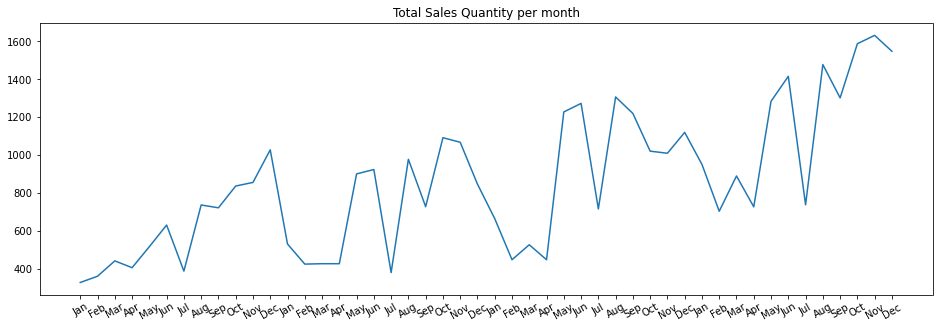

In [8]:
import matplotlib.pyplot as plt
SalesQuantity=pd.crosstab(columns=StoreSalesData['Year'],
            index=StoreSalesData['Month'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline
SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [9]:
SalesQuantity.values

array([ 328,  361,  442,  406,  517,  631,  388,  737,  722,  837,  856,
       1028,  531,  425,  427,  427,  901,  924,  380,  978,  728, 1092,
       1068,  847,  665,  448,  527,  448, 1228, 1273,  716, 1307, 1220,
       1021, 1010, 1120,  951,  704,  890,  727, 1284, 1416,  738, 1478,
       1302, 1588, 1632, 1548], dtype=int64)

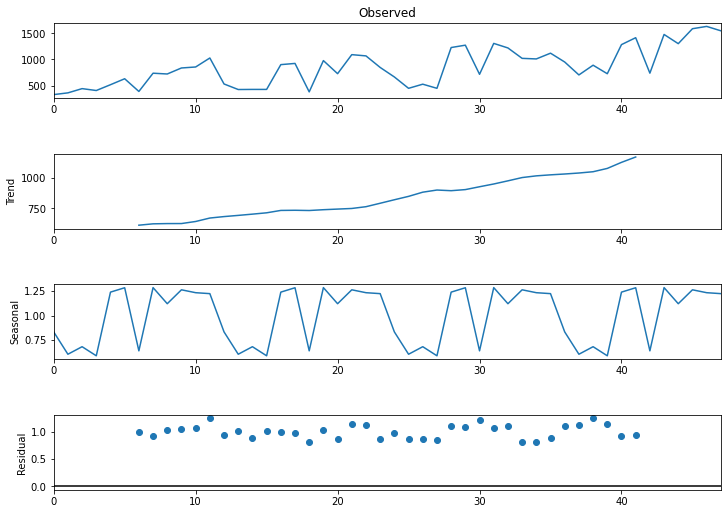

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantity.values
result = seasonal_decompose(series, model='multiplicative', period=12)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

## The key steps in ARIMA/SARIMA modelling:
* Plot the time series data and observe the trend and seasonality
* Use statistical tests like ADF and KPSS to check for stationarity
* If the series is not stationary, use transformations like differencing or detrending. For seasonal data, one may require seasonal differencing in addition to non seasonal differencing.However, never use more than one order of seasonal differencing and the sum of the seasonal and non seasonal differencing should not exceed 2.
* Once the order of differencing is determined, we need to decide on the optimal AR and MA terms.
* **If the autocorrelation at the seasonal lag k is positive (in our case k=12,24,36) add a seasonal AR term (P) to the model. If the autocorrelation at the seasonal lag is negative, add a seasonal MA term (Q) to the model. Care should be taken to not include both seasonal AR and MA terms in the same model and the order of each should not be more than 1.**
* Use the ACF and PACF plots to get a range within which the parameters p,P,q,Q should lie. Use auto.arima and specify the range of these parameters.
* Check for the assumptions of the regression model i.e. normality of errors and no autocorrelation between the errors.

## Testing For Stationarity
### Augmented Dickey Fuller Test

Lower P value indicates that the data is stationary.

In [58]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [59]:
adfuller_test(SalesQuantity.values)

ADF Test Statistic : -3.140282872684205
p-value : 0.023712175964464562
#Lags Used : 0
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Since p-value is less than 0.05, so we reject null hypothesis. The data is stationary.

## ACF and PACF Plots

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

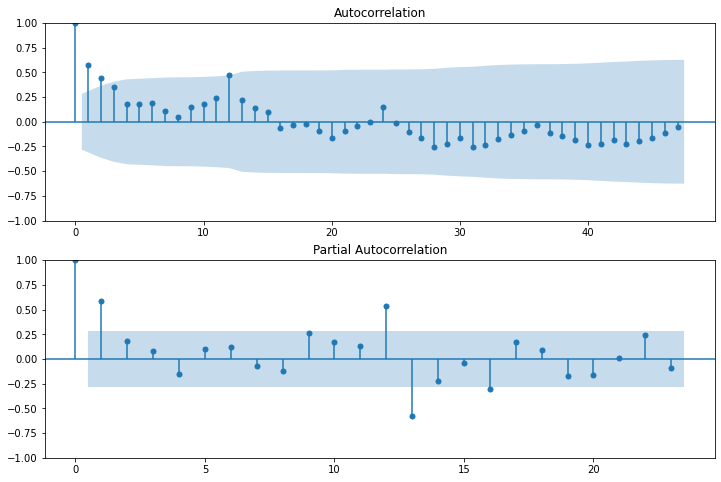

In [53]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(SalesQuantity.values,lags=47,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(SalesQuantity.values,lags=23,ax=ax2)

## Auto ARIMA

In [64]:
import pmdarima as pm
from pmdarima import auto_arima

In [109]:
def autoArima(InpData):
    model = auto_arima(InpData, start_p=0, start_q=0,
                          max_p=2, max_q=2,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)
    print(model.summary())
    return model

In [110]:
model1=autoArima(SalesQuantity)
#print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=478.210, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=471.431, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=467.041, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=471.752, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=469.033, Time=0.30 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=469.032, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=468.062, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=473.956, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=467.052, Time=0.37 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=471.810, Time=0.19 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.38 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
T

## Creating the predictive model for Total Sales Data

In [82]:
train=SalesQuantity[:34]
test=SalesQuantity[34:]

In [83]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = SARIMAX(Train,  
                        order = (0, 1, 1),  
                        seasonal_order =(0, 1, 1, 12))
SalesModel = SarimaxModel.fit()
  
#SalesModel.plot_diagnostics(figsize=(15, 12));

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'SalesQuantity')]

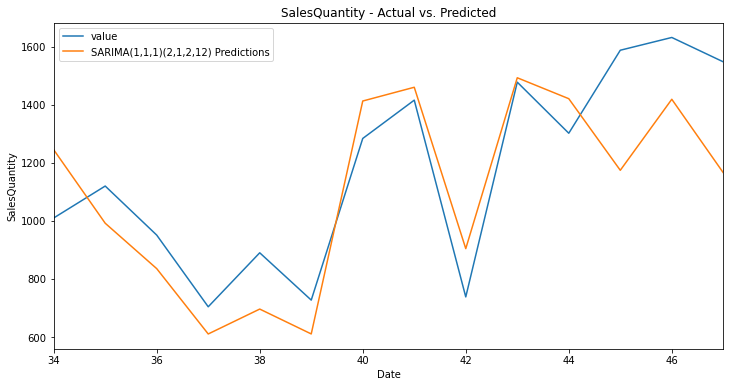

In [85]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = SalesModel.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,1)(2,1,2,12) Predictions')
# Plot predictions against known values
title = 'SalesQuantity - Actual vs. Predicted'
ylabel='SalesQuantity'
xlabel='Date'

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

Next Six Month Forecast: 49     784.158224
50     869.984582
51     784.279465
52    1586.898398
53    1634.308330
54    1078.232486
Name: Forecast, dtype: float64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9371      0.158     -5.940      0.000      -1.246      -0.628
ma.S.L12       0.0818      0.381      0.215      0.830      -0.665       0.829
sigma2      3.205e+04   1.49e+04      2.144      0.032    2755.953    6.14e+04
#### Accuracy of model: 77.01 ####


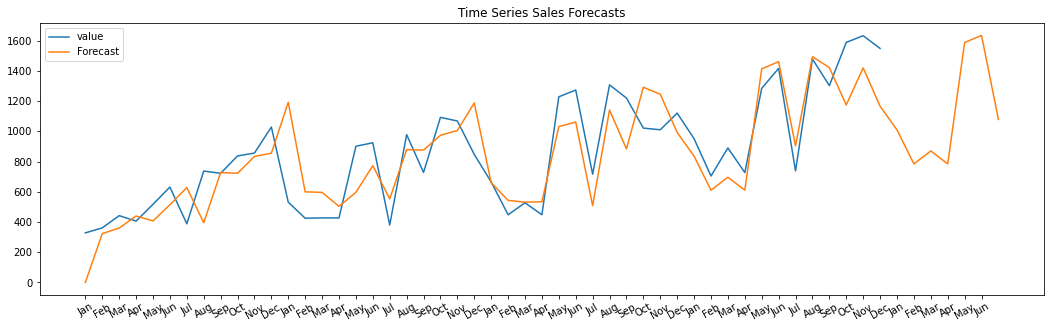

In [88]:
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantity)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])
print(SalesModel.summary().tables[1])

# Plot the forecast values
SalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model
MAPE=np.mean(abs(SalesQuantity-forecast)/SalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=MonthNames+MonthNames[0:6]
plotlabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=30)

## Drilling down category wise

In [91]:
StoreSalesData.groupby(['Category']).sum()

,Row ID,Sales,Quantity,Discount,Profit,Month,Year
Category,,,,,,,
Furniture,13299177,1.343623e+06,9096,335.49,125927.2905,17839,4887064
Office Supplies,33974643,8.843154e+05,23133,974.29,105512.4025,45768,12430938
Technology,13231680,1.357490e+06,8993,327.15,204593.8560,17465,4822535


In [92]:
StoreSalesData.groupby(['Category']).sum()[['Sales','Quantity','Profit','Discount']]

,Sales,Quantity,Profit,Discount
Category,,,,
Furniture,1.343623e+06,9096,125927.2905,335.49
Office Supplies,8.843154e+05,23133,105512.4025,974.29
Technology,1.357490e+06,8993,204593.8560,327.15


## Choosing Technology category because it has the highest profit

In [93]:
# Filtering only Technology data
TechnologySalesData=StoreSalesData[StoreSalesData['Category']=='Technology']

## Sales Quantity per month for Technology category

In [111]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=TechnologySalesData['Month'],
            index=TechnologySalesData['Year'],
            values=TechnologySalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,70,102,106,65,138,143,100,190,103,159,195,228
2012,132,108,108,79,211,218,89,223,133,306,209,159
2013,140,100,127,92,216,307,185,280,253,209,270,221
2014,178,174,191,162,285,291,162,299,263,321,363,330


## Visualizing the Sales Quantity for Technology category

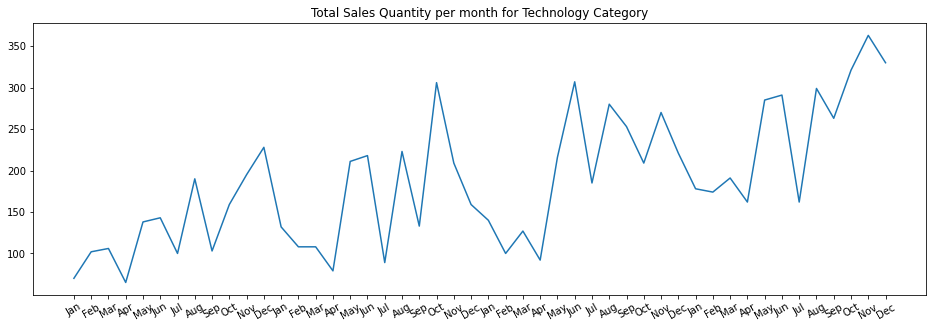

In [112]:
import matplotlib.pyplot as plt
SalesQuantity_T=pd.crosstab(columns=TechnologySalesData['Year'],
            index=TechnologySalesData['Month'],
            values=TechnologySalesData['Quantity'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
SalesQuantity_T.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Technology Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [113]:
model2=autoArima(SalesQuantity_T)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=398.041, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=381.517, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=393.183, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=380.547, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=385.490, Time=0.31 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=380.158, Time=0.37 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=381.920, Time=0.20 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(2,1,0)(2,1,0)[12] intercept   : AIC=381.469, Time=0.70

## Creating the predictive model for Technology Category

Next Six Month Forecast: 49    245.655988
50    251.517843
51    221.338590
52    350.727428
53    386.959423
54    260.621814
Name: Forecast, dtype: float64
#### Accuracy of model: 73.01 ####


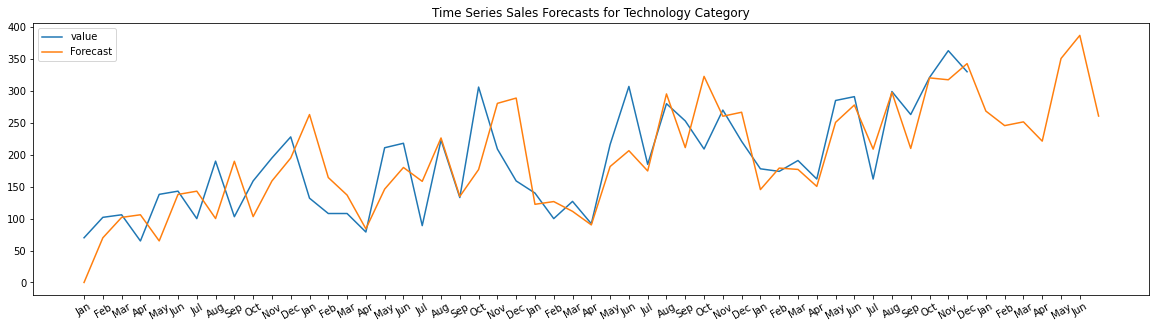

In [114]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = model = SARIMAX(SalesQuantity_T, 
                        order = (2, 1, 0),  
                        seasonal_order =(2, 1, 0, 12))

SalesModel = SarimaxModel.fit()
  
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantity_T)) + 6,
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
SalesQuantity_T.plot(figsize = (20, 5), legend = True, title='Time Series Sales Forecasts for Technology Category')
forecast.plot(legend = True, figsize=(20,5))

print("Next Six Month Forecast:",forecast[-6:])

# Measuring the accuracy of the model
MAPE=np.mean(abs(SalesQuantity_T-forecast)/SalesQuantity_T)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=30)

## Sales Quantity per month for Furniture category

In [115]:
# Filtering only Furniture data
FurnitureSalesData=StoreSalesData[StoreSalesData['Category']=='Furniture']

## Sales Quantity per month for Furniture category

In [116]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=FurnitureSalesData['Month'],
            index=FurnitureSalesData['Year'],
            values=FurnitureSalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,44,82,95,82,121,176,59,186,170,205,194,212
2012,134,102,94,102,151,163,74,193,130,171,249,175
2013,176,110,117,119,274,247,164,298,309,247,219,262
2014,226,167,260,174,241,292,166,276,334,375,353,326


## Visualizing the Sales Quantity for Furniture category

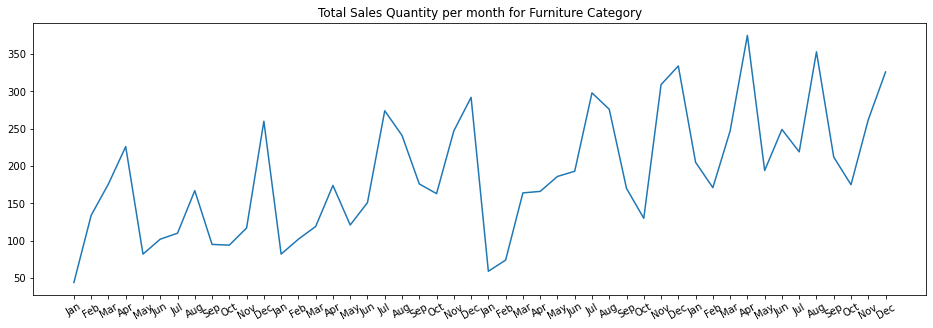

In [132]:
import matplotlib.pyplot as plt
SalesQuantity_F=pd.crosstab(columns=FurnitureSalesData['Month'],
            index=FurnitureSalesData['Year'],
            values=FurnitureSalesData['Quantity'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
SalesQuantity_F.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Furniture Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [119]:
model3=autoArima(SalesQuantity_F)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=404.773, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=396.658, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=396.746, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=391.532, Time=0.30 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=399.845, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=393.389, Time=0.55 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=393.463, Time=0.62 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]          
Total fit time: 5.771 seconds
                                     SARIMAX 

## Creating the predictive model for Furniture Category

Next Six Month Forecast: 49    175.599970
50    219.920427
51    303.364919
52    197.761755
53    237.776986
54    299.090894
Name: Forecast, dtype: float64
#### Accuracy of model: 60.55 ####


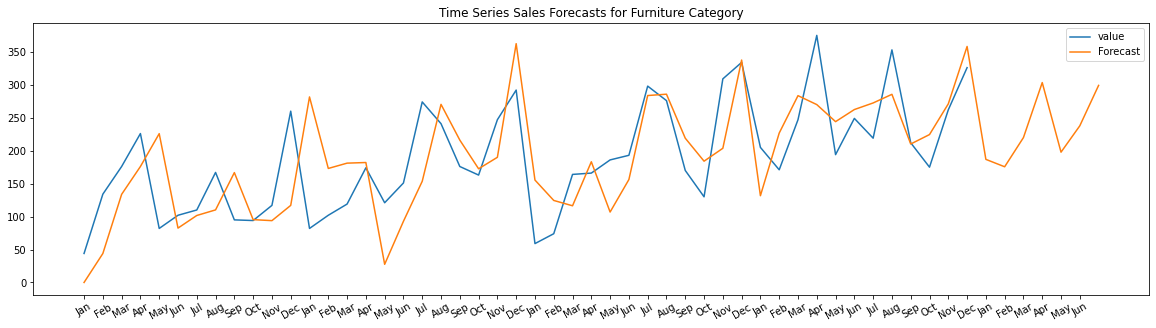

In [133]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = model = SARIMAX(SalesQuantity_F, 
                        order = (1, 1, 0),  
                        seasonal_order =(2, 1, 0, 12))

SalesModel = SarimaxModel.fit()
  
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantity_F)) + 6,
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
SalesQuantity_F.plot(figsize = (20, 5), legend = True, title='Time Series Sales Forecasts for Furniture Category')
forecast.plot(legend = True, figsize=(20,5))

print("Next Six Month Forecast:",forecast[-6:])

# Measuring the accuracy of the model
MAPE=np.mean(abs(SalesQuantity_F-forecast)/SalesQuantity_F)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=30)

## Sales Quantity per month for Office Supplies category

In [134]:
# Filtering only Office Supplies data
OfficeSalesCategory=StoreSalesData[StoreSalesData['Category']=='Office Supplies']

In [135]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=OfficeSalesCategory['Month'],
            index=OfficeSalesCategory['Year'],
            values=OfficeSalesCategory['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,214,177,241,259,258,312,229,361,449,473,467,588
2012,265,215,225,246,539,543,217,562,465,615,610,513
2013,349,238,283,237,738,719,367,729,658,565,521,637
2014,547,363,439,391,758,833,410,903,705,892,916,892


## Visualizing the Sales Quantity for Office Supplies category

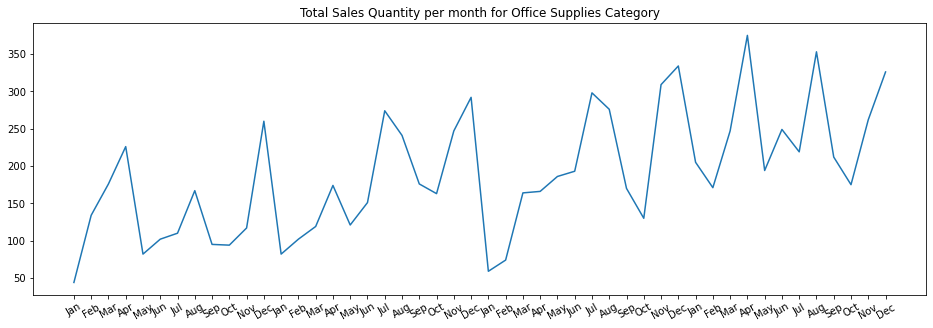

In [136]:
import matplotlib.pyplot as plt
SalesQuantity_O=pd.crosstab(columns=FurnitureSalesData['Month'],
            index=FurnitureSalesData['Year'],
            values=FurnitureSalesData['Quantity'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
SalesQuantity_O.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Office Supplies Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [137]:
model3=autoArima(SalesQuantity_O)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=404.773, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=396.658, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=396.746, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=391.532, Time=0.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=399.845, Time=0.17 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=393.389, Time=0.45 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=393.463, Time=0.60 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]          
Total fit time: 5.905 seconds
                                     SARIMAX 

## Creating the predictive model for Office Supplies Category

Next Six Month Forecast: 49    175.599970
50    219.920427
51    303.364919
52    197.761755
53    237.776986
54    299.090894
Name: Forecast, dtype: float64
#### Accuracy of model: 60.55 ####


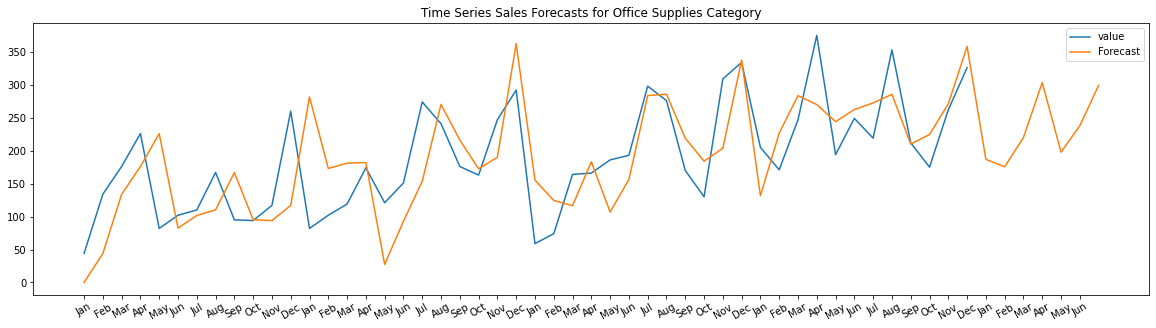

In [138]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = model = SARIMAX(SalesQuantity_O, 
                        order = (1, 1, 0),  
                        seasonal_order =(2, 1, 0, 12))

SalesModel = SarimaxModel.fit()
  
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantity_O)) + 6,
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
SalesQuantity_O.plot(figsize = (20, 5), legend = True, title='Time Series Sales Forecasts for Office Supplies Category')
forecast.plot(legend = True, figsize=(20,5))

print("Next Six Month Forecast:",forecast[-6:])

# Measuring the accuracy of the model
MAPE=np.mean(abs(SalesQuantity_O-forecast)/SalesQuantity_O)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=30)